In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1) Cuadrados mínimos e interpolación

La siguiente tabla muestra el peso de un niño en función de la edad:

| x | 1  | 2  | 4 | 6 |
|---|----|----|---|---|
| y | 10 | 12 | 17| 20 |

1. Hallar los coeficientes de la recta $r_1(x) = c_0 + c_1 x$ que mejor aproxima los datos en el sentido de cuadrados mínimos.
2. Hallar los coeficientes de la recta $r_2(x) = d_0 x$ que mejor aproxima los datos en el sentido de cuadrados mínimos.
3. Hallar el polinomio de grado 3, $p(x) = e_0 + e_1 x + e_2 x^2 + e_3 x^3$, que mejor aproxima los datos en el sentido de cuadrados mínimos.

Graficar en cada caso los datos originales y la función obtenida.

Calcular en cada caso el error cuadrático 
$$\sum_{i=1}^4 (y_i - f(x_i))^2$$
donde $f$ es la función obtenida en cada caso. ¿Coinciden los valores obtenidos con lo esperado?

[8.08474576 2.05084746]


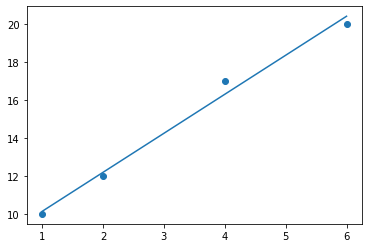

In [2]:
x = np.array([1,2,4,6])
y = np.array([10, 12, 17, 20])

A = np.c_[np.ones(4), x]
c = np.linalg.solve(A.T@A, A.T@y)
print(c)

plt.scatter(x,y)

xs = np.linspace(1,6,1000)
ys = c[0] + c[1] * xs
plt.plot(xs,ys)


[[1]
 [2]
 [4]
 [6]]
[3.89473684]


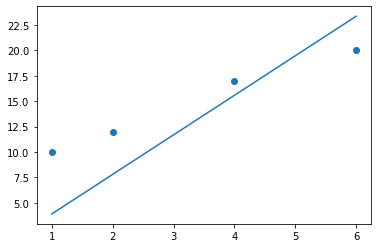

In [3]:
A = np.c_[x]
print(A)
d = np.linalg.solve(A.T @ A, A.T @ y)
print(d)

plt.scatter(x,y)

xs = np.linspace(1,6,1000)
ys = d[0] * xs
plt.plot(xs,ys)


[[  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   4.  16.  64.]
 [  1.   6.  36. 216.]]
239.99999999999977
[ 9.          0.33333333  0.75       -0.08333333]


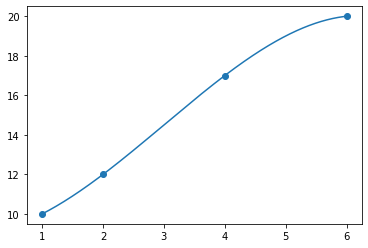

In [5]:
A = np.c_[np.ones(4), x, x**2, x**3]
print(A)
print(np.linalg.det(A))

e = np.linalg.solve(A, y)
print(e)

plt.scatter(x,y)

xs = np.linspace(1,6,1000)
ys = e[0] + e[1] * xs + e[2] * xs**2 + e[3] * xs**3
plt.plot(xs,ys)


[2.26871751 0.39821422]


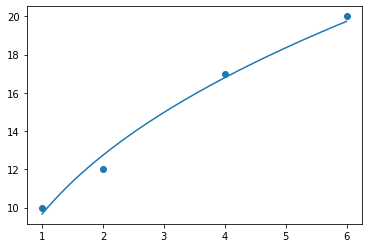

In [46]:
# Ajustamos una funcion f(x) = a x^b

x = np.array([1,2,4,6])
y = np.array([10, 12, 17, 20])


A = np.c_[np.ones(4), np.log(x)]
s = np.linalg.solve(A.T@A, A.T@ np.log(y))
print(s)


plt.scatter(x,y)

xs = np.linspace(1,6,1000)
ys = (np.e**s[0]) * xs ** s[1]
plt.plot(xs,ys)


# 2) Cancha de fútbol
La altura de una cancha de futbol en un corte transversal describe una parábola.

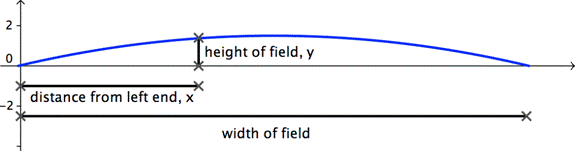

Se mide la altura en ciertos puntos y se obtienen los siguientes valores:

| x | 10  | 35  | 40 | 50 | 65 |
|---|----|----|---|---|---|
| y | 0.20 | 0.37 | 0.36| 0.3 | 0.1 |

1. Hallar los coeficientes de la parábola $p(x) = c_0 + c_1 x + c_2 x^2$ que mejor aproxima los datos en el sentido de cuadrados mínimos.
2. Sabiendo que la cancha tiene 70m de ancho y que la altura en los bordes es de 0m, que función utilizaría para ajustar los datos aprovechando esta información. Hallar los coeficientes de dicha función por mínimos cuadrados.

Graficar los datos y las funciones obtenidas. Calcular la suma los errores cuadráticos. ¿En cuál caso se obtiene un error cuadrático menor? ¿Cuál función utilizarían para construir una cancha?   

[ 0.03166269  0.01970008 -0.00028687]


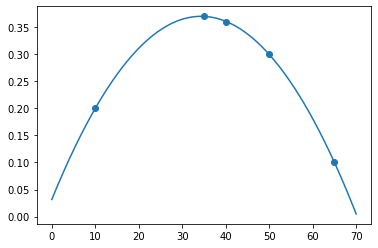

In [6]:
x = np.array([10, 35, 40, 50, 65])
y = np.array([0.2, 0.37, 0.36, 0.3, 0.1])

A = np.c_[np.ones(5), x, x**2]

c = np.linalg.solve(A.T @ A, A.T @ y)
print(c)


plt.scatter(x,y)

xs = np.linspace(0,70,1000)
ys = c[0] + c[1] * xs + c[2] * xs**2
plt.plot(xs,ys)

[ -600 -1225 -1200 -1000  -325]
[[ -600]
 [-1225]
 [-1200]
 [-1000]
 [ -325]]
[-0.0003036]


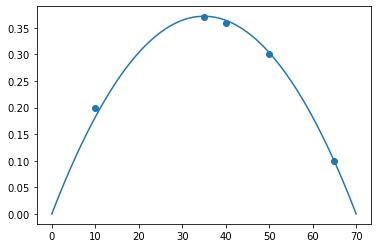

In [7]:
v = x * (x-70)
print(v)

A = np.c_[v]
print(A)

c = np.linalg.solve(A.T @ A, A.T @ y)
print(c)

plt.scatter(x,y)

xs = np.linspace(0,70,1000)
ys = c[0] * (xs * (xs-70))
plt.plot(xs,ys)

# 3) Regresión linear múltiple

Queremos ver si es posible obtener una buena estimación de las exportaciones totales de Argentina conociendo solo las exportaciones de algunas variables.

1. Leer el archivo exportaciones.csv
2. Tomando 


- x0 = exportación agropecuarias
- x1 = exportación industriales
- x2 = exportación de caucho
- y = exportación total

ajustar por mínimos cuadrados los coeficientes de un modelo
$$ y = c_0 x_0 + c_1 x_1 + c_2 x_2. $$

Calcular la norma-2 del vector de errores. ¿Se ha obtenido una buena estimación?

In [55]:
# Cargo los datos desde el archivo
data_frame = pd.read_csv('variablesExportacion_4variables.csv')
display(data_frame.head(8))

# Lo convierto a una matriz de numpy
xy = data_frame.to_numpy(dtype='float')
display(xy[:8])

y = xy[:,1]
x0 = xy[:,2]
x1 = xy[:,3]
x2 = xy[:,4]

y = y / np.linalg.norm(y)
x0 = x0 / np.linalg.norm(x0)
x1 = x1 / np.linalg.norm(x1)
x2 = x2 / np.linalg.norm(x2)


A = np.c_[x0, x1, x2]
c = np.linalg.solve(A.T@A, A.T@y)
print(c)

,ano,EXPO_TOT_2004,EXPO_AGROP_2004,EXPO_INDUST_2004,EXPO_CAUCHO_2004
0,1966,6333634.22,5675922.71,657711.52,2077.04
1,1967,5835217.42,5254582.56,580634.86,4467.94
2,1968,4558947.98,3685459.82,873488.16,10769.84
3,1969,5175646.33,4350920.16,824726.17,24872.42
4,1970,4184635.10,3341704.72,842930.38,21749.05
5,1971,4322811.98,3394203.42,928608.56,13193.28
6,1972,4298510.74,3289516.91,1008993.83,16712.47
7,1973,5016985.22,3408794.66,1608190.56,26719.03


array([[1.96600000e+03, 6.33363422e+06, 5.67592271e+06, 6.57711520e+05,
        2.07704000e+03],
       [1.96700000e+03, 5.83521742e+06, 5.25458256e+06, 5.80634860e+05,
        4.46794000e+03],
       [1.96800000e+03, 4.55894798e+06, 3.68545982e+06, 8.73488160e+05,
        1.07698400e+04],
       [1.96900000e+03, 5.17564633e+06, 4.35092016e+06, 8.24726170e+05,
        2.48724200e+04],
       [1.97000000e+03, 4.18463510e+06, 3.34170472e+06, 8.42930380e+05,
        2.17490500e+04],
       [1.97100000e+03, 4.32281198e+06, 3.39420342e+06, 9.28608560e+05,
        1.31932800e+04],
       [1.97200000e+03, 4.29851074e+06, 3.28951691e+06, 1.00899383e+06,
        1.67124700e+04],
       [1.97300000e+03, 5.01698522e+06, 3.40879466e+06, 1.60819056e+06,
        2.67190300e+04]])

[ 0.49970242  0.51164945 -0.00332698]


# 4) Aproximación de integrales

Para estimar el área bajo una curva en un intervalo $[a, b]$, puede utilizarse la regla de los trapecios, que consiste en tomar puntos (equiespaciados) en el intervalo, y calcular las áreas de los trapecios que se forman.

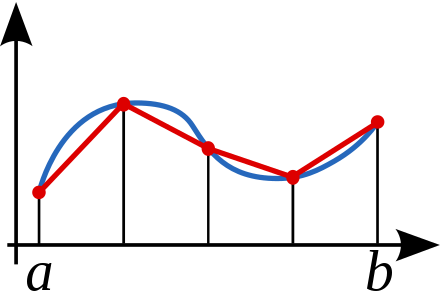

1. Tomando 5 puntos equiespaciados en el intervalo $[0, \pi]$, estimar el área abajo de la curva $f(x) = \sin(x)$, con $x \in [0, \pi]$.
2. Implementar un programa que reciba un valor $n$ y repita el ítem anterior tomando $n + 1$ punto equiespaciados.


In [56]:
A = np.sin(np.pi/4) * np.pi/4 / 2
B = (np.sin(np.pi/4) + 1) / 2 * np.pi/4
print(A + B + B + A)

1.8961188979370398
